In [1]:
import matplotlib.pyplot as plt
import pystac

from mccn.extent import GeoBoxBuilder
from mccn.loader.base import FilterConfig, ProcessConfig
from mccn.loader.point import PointLoader
from mccn.parser import parse_item

### Standard Collection

In [2]:
std_collection = pystac.Collection.from_file(
    "tests/files/unit_tests/point/standard/stac/collection.json"
)
std_loader = PointLoader(
    [parse_item(item) for item in std_collection.get_items(recursive=True)],
    FilterConfig(GeoBoxBuilder.from_collection(std_collection, 120)),
)
std_ds = std_loader.load()
std_ds

<xarray.Dataset> Size: 117kB
Dimensions:      (time: 1, lat: 120, lon: 120)
Coordinates:
  * time         (time) datetime64[ns] 8B 2024-12-31T14:20:00
    spatial_ref  int32 4B 4326
  * lat          (lat) float64 960B -37.9 -37.9 -37.9 ... -37.91 -37.91 -37.91
  * lon          (lon) float64 960B 144.6 144.6 144.6 ... 144.6 144.6 144.6
Data variables:
    temperature  (time, lat, lon) float64 115kB nan nan nan nan ... nan nan nan

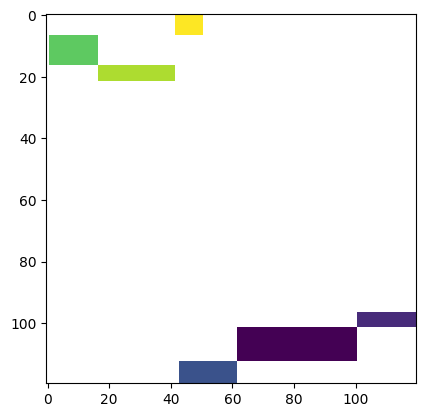

In [3]:
plt.imshow(std_ds.temperature.values[0, :, :])

### Conversion Alias

In [4]:
conversion_collection = pystac.Collection.from_file(
    "tests/files/unit_tests/point/conversion/stac/collection.json"
)
conversion_loader = PointLoader(
    items =[parse_item(item) for item in conversion_collection.get_items(recursive=True)],
    filter_config = FilterConfig(GeoBoxBuilder.from_collection(conversion_collection, 120)),
    process_config = ProcessConfig(rename_bands={"temperature_F": "temperature"}, process_bands={"temperature_F": lambda x: (x - 32)*5/9})
)
conversion_ds = conversion_loader.load()
conversion_ds

<xarray.Dataset> Size: 117kB
Dimensions:      (time: 1, lat: 120, lon: 120)
Coordinates:
  * time         (time) datetime64[ns] 8B 2024-12-31T14:20:00
    spatial_ref  int32 4B 4326
  * lat          (lat) float64 960B -37.9 -37.9 -37.9 ... -37.91 -37.91 -37.91
  * lon          (lon) float64 960B 144.6 144.6 144.6 ... 144.6 144.6 144.6
Data variables:
    temperature  (time, lat, lon) float64 115kB nan nan nan nan ... nan nan nan

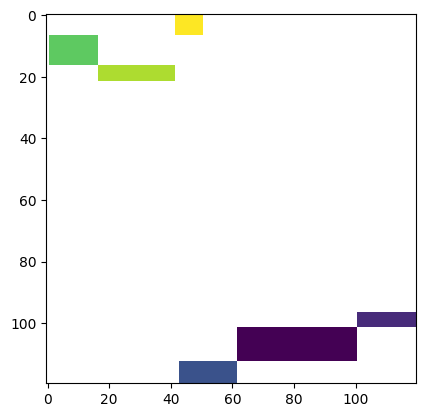

In [5]:
plt.imshow(conversion_ds.temperature.values[0, :, :])